# 1. Install Dependencies and Setup

In [2]:
pip install --upgrade tensorflow-gpu

Defaulting to user installation because normal site-packages is not writeable
  Using cached tensorflow_gpu-2.10.1-cp39-cp39-win_amd64.whl (455.9 MB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [1]:
!pip list

Package                       Version
----------------------------- --------------------
absl-py                       1.3.0
alabaster                     0.7.12
anaconda-client               1.11.0
anaconda-navigator            2.3.1
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.2
astroid                       2.11.7
astropy                       5.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         21.4.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.9.1
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binaryornot                   0.4.4
bi

In [12]:
import tensorflow as tf
import os

In [13]:
gpus=tf.config.list_physical_devices('GPU')
len(gpus)

0

In [14]:
tf.config.list_physical_devices('GPU')


[]

In [15]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

# 2. Remove dodgy images

In [16]:
!pip install opencv_python
import cv2
import imghdr

Defaulting to user installation because normal site-packages is not writeable


In [17]:
data_dir = 'data' 

In [18]:
os.listdir(data_dir)

['happy', 'sad']

In [19]:
#every happy image 
os.listdir(os.path.join (data_dir,'happy'))

['-crossbreed-dog-german-shepherd-during-sunset-in-grass-e1576859426599-scaled.jpg',
 '10-tips-for-a-happy-healthy-dog-72579499-1280.jpg',
 '1000_F_171479019_6UvsiH5Erd8m3GCcCC5AdhVwpiqkfvJb.jpg',
 '1488795107-happy-dog.jpg',
 '1513864692-yorkshire-terrier-happy-dog.jpg',
 '17309155_10154656967826645_6224115650834524751_n.jpg',
 '2564871.jpg',
 '27horowitz2-superJumbo-v2.jpg',
 '3-VO2JJX_400x400.jpg',
 '40-Tips-On-How-to-Make-Your-Dog-Happy-Be-the-Best-Dog-Owner-Ever.jpg',
 '41AmZCiApmL._SR6002C315_PIWhiteStrip2CBottomLeft2C02C35_SCLZZZZZZZ_FMpng_BG2552C2552C255.jpg',
 '41IHi-EreTL.jpg',
 '5-ways-to-keep-your-dog-happy-and-healthy.jpg',
 '7488228009d153e94a00427f674d54bb.jpg',
 '79269692_2676500192405046_8477485957279383552_o-6-768x1024.jpg',
 '7f643f0db514d7971349c416e29e42a8.jpg',
 '8c13b0_149bf923696f4891a4e1d2863da36ed7mv2.jpg',
 '920920_081115-cc-happy-dog-img.jpg',
 '9781787836952.jpg',
 'A-tired-dog-is-a-happy-dog-1-min.jpg',
 'Belle.jpg',
 'CANS_dogsmiling_379727605.jpg',
 'Cro

In [20]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [21]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
tf.keras.utils.image_dataset_from_directory??
#import data pipline for me 

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [24]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 163 files belonging to 2 classes.


In [25]:
data_iterator = data.as_numpy_iterator()

In [26]:
batch = data_iterator.next()

In [27]:
batch
#batch of images and their labels 

(array([[[[ 86.89453   ,  58.90039   ,  36.90625   ],
          [ 69.35156   ,  42.421875  ,  21.47461   ],
          [ 89.234375  ,  66.38086   ,  48.498047  ],
          ...,
          [ 81.384766  ,  76.50195   ,  73.53125   ],
          [ 85.92969   ,  80.92969   ,  77.92969   ],
          [ 86.99414   ,  81.99414   ,  78.99414   ]],
 
         [[ 90.89019   ,  61.630074  ,  35.81562   ],
          [102.515656  ,  75.574776  ,  50.807198  ],
          [ 89.684555  ,  66.212975  ,  44.50985   ],
          ...,
          [ 91.7215    ,  84.92853   ,  82.59454   ],
          [ 92.36403   ,  85.45387   ,  83.09059   ],
          [ 91.462364  ,  83.28623   ,  81.55594   ]],
 
         [[ 98.77427   ,  69.181755  ,  36.45324   ],
          [140.6655    , 113.33064   ,  81.649     ],
          [102.97404   ,  79.11514   ,  50.509514  ],
          ...,
          [100.12503   ,  90.68721   ,  89.49401   ],
          [ 96.85196   ,  86.49864   ,  84.90011   ],
          [ 92.055244  ,  79.69

In [28]:
batch[1]
#labels

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

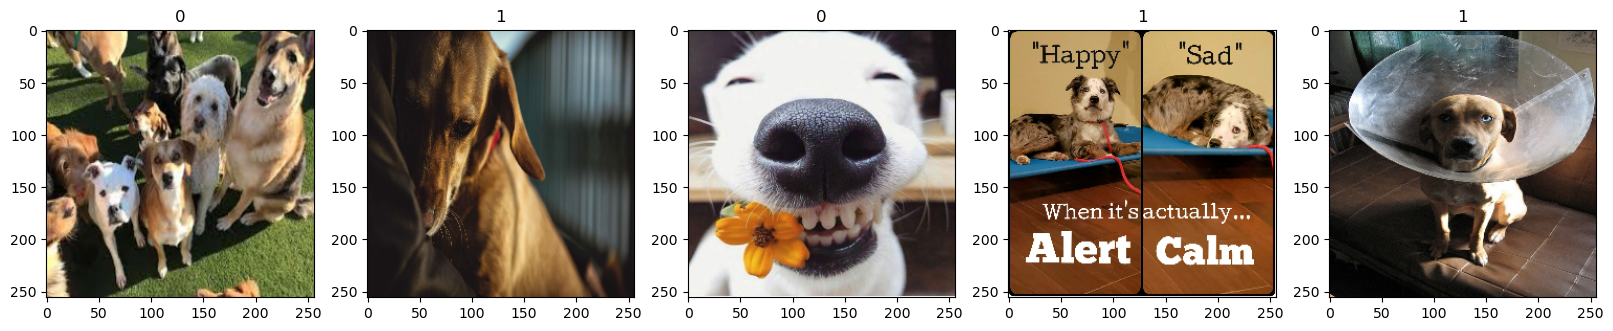

In [29]:
#1 for sad and 0 for happy 
fig, ax = plt.subplots(ncols=5, figsize=(20,20))
for idx, img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [30]:
data = data.map(lambda x,y: (x/255, y))

In [31]:
data.as_numpy_iterator().next()
#images become between 0 and 1 

(array([[[[0.07843138, 0.08627451, 0.13333334],
          [0.07450981, 0.08235294, 0.13333334],
          [0.07450981, 0.08235294, 0.14117648],
          ...,
          [0.10196079, 0.10196079, 0.13333334],
          [0.10196079, 0.10588235, 0.1254902 ],
          [0.11372549, 0.11764706, 0.12941177]],
 
         [[0.08627451, 0.09411765, 0.14117648],
          [0.07450981, 0.08235294, 0.13333334],
          [0.07450981, 0.08235294, 0.14117648],
          ...,
          [0.10196079, 0.10196079, 0.13333334],
          [0.10196079, 0.10588235, 0.1254902 ],
          [0.10980392, 0.11372549, 0.1254902 ]],
 
         [[0.07909773, 0.08694087, 0.13399969],
          [0.07450981, 0.08235294, 0.13333334],
          [0.07450981, 0.08235294, 0.14117648],
          ...,
          [0.10196079, 0.10196079, 0.13333334],
          [0.10196079, 0.10588235, 0.1254902 ],
          [0.10588235, 0.10980392, 0.12156863]],
 
         ...,
 
         [[0.234038  , 0.25823376, 0.14776348],
          [0.24388

In [32]:
data.as_numpy_iterator().next()[0].min()

0.0

# 5. Split Data

In [33]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [34]:
train_size+val_size+test_size

7

In [35]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [36]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [38]:
inputshape=data.as_numpy_iterator().next()[0][0].shape

In [39]:
inputshape

(256, 256, 3)

In [44]:
from tensorflow import keras
from tensorflow.keras import layers
model = Sequential([
     # First Convolutional Block
    layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
                  # give the input dimensions in the first layer
                  # [height, width, color channels(RGB)]
                  input_shape=inputshape),
    layers.MaxPool2D(),

    # Second Convolutional Block
    layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Third Convolutional Block
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),

    # Classifier Head
    layers.Flatten(),
    layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
    
])

In [45]:
model.compile( optimizer=tf.keras.optimizers.Adam(epsilon=0.001), loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)     

# 7. Train

In [246]:
logdir='logs'

In [247]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [248]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 1.0000  WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000001A46FCF6C10> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set 

# 8. Plot Performance

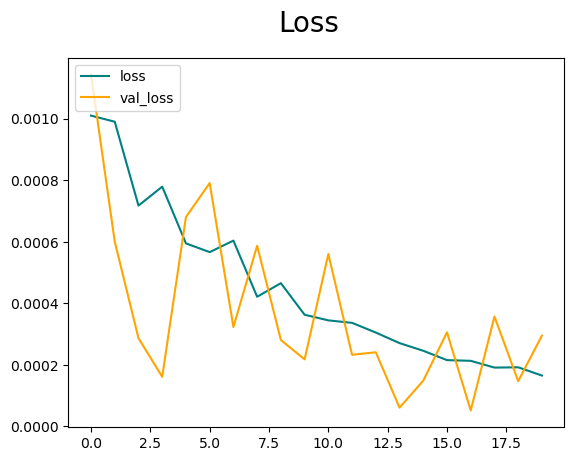

In [249]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

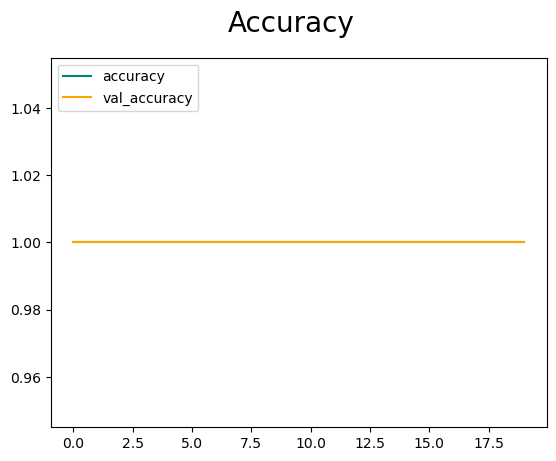

In [252]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [253]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [254]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [255]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [256]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# 10. Test

In [257]:
import cv2

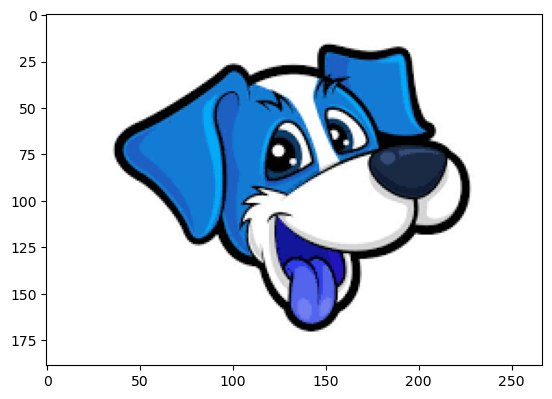

In [263]:
img = cv2.imread('HAPPY.png')
plt.imshow(img)
plt.show()

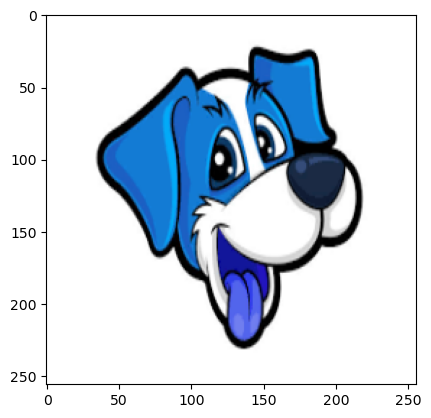

In [264]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [265]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 45ms/step


In [266]:
yhat

array([[1.2824805e-12]], dtype=float32)

In [267]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [47]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models','imageclassifier.h5'))

In [49]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5

In [50]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined